# San Francisco Salaries

In [2]:
import pandas as pd

### Erstelle aus salaries.csv einen DataFrame

In [3]:
sal = pd.read_csv("salaries.csv", na_values=['Not Provided'])

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


** Empfohlen: `head()` **

In [3]:
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


### Wie viele Observations gibt es?

In [12]:
sal.size

1932502

### Was ist das arithmetische Mittel von `BasePay`?
Lösung: `66325.44884050643`

In [13]:
sal["BasePay"].mean()

66325.44884050643

### Was ist der höchste Geldbetrag, der als `OvertimePay` vorhanden ist?
Lösung: `245131.88`

In [15]:
sal["OvertimePay"].max()

245131.88

### Welchen Job hat JOSEPH DRISCOLL? (**Nicht** Joseph Driscoll).
Lösung:
```
CAPTAIN, FIRE SUPPRESSION
```

In [18]:
sal[sal["EmployeeName"] == "JOSEPH DRISCOLL"]["JobTitle"]

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

### Was ist das Gesamtgehalt von JOSEPH DRISCOLL?
Lösung:
```
270324.91
```

In [20]:
sal[sal["EmployeeName"] == "JOSEPH DRISCOLL"]["TotalPayBenefits"]

24    270324.91
Name: TotalPayBenefits, dtype: float64

### Wie lautet der Name der bestverdienensten Person?
Lösung: `NATHANIEL FORD`

In [10]:
maxSal = sal["TotalPayBenefits"].max()
sal[sal["TotalPayBenefits"] == maxSal]["EmployeeName"]


0    NATHANIEL FORD
Name: EmployeeName, dtype: object

### Wie lautet der Name der am schlechtest bezahlten Person?
Lösung: `Joe Lopez`

In [11]:
minSal = sal["TotalPayBenefits"].min()
sal[sal["TotalPayBenefits"] == minSal]["EmployeeName"]


148653    Joe Lopez
Name: EmployeeName, dtype: object

### Ermittle für die Jahre 2011-2014 den arithmetischen Mittelwert des `BasePay`s aller Personen.
Lösung:
```
Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
```


In [16]:
sal.groupby("Year")["BasePay"].mean()


Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

### Wie viele unterschiedliche Jobs gibt es?
Lösung: `2159`

In [27]:
sal["JobTitle"].unique().size


2159

### Welche sind die Top 5 häufigsten Jobs und wie viele gibt es davon jeweils?
Lösung:
```
Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64
```


In [28]:
sal["JobTitle"].value_counts()[:5]


Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

### Wie viele Jobs gibt es, die 2013 nur eine Person ausübte?
Lösung: `202`

In [34]:
jobs_2013 = sal[sal["Year"] == 2013]["JobTitle"].value_counts()
jobs_2013[jobs_2013==1].size

202

### Wie viele läute haben `'chief'` (caseinsensitive) im Jobnamen?
Lösung: `627`

In [93]:
sal["JobTitle"].apply(lambda title: "chief" in title.lower()).sum()

627

<AxesSubplot:xlabel='Year', ylabel='Count'>

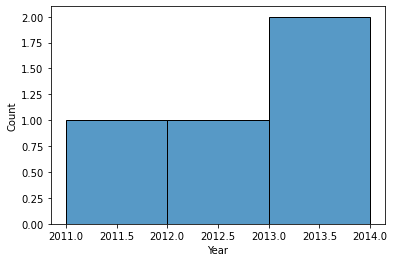

In [99]:
### Erstelle ein Histogramm 
import seaborn as sns
salbyyear = sal.groupby("Year")["TotalPayBenefits"].mean()
sns.histplot(data=salbyyear,x="Year")